In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil

In [2]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-28 03:52:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.21MB/s    in 40s     

2021-07-28 03:53:25 (7.61 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [6]:
import os
import zipfile
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import os
fold_gunting = os.path.join('/content/rockpaperscissors/scissors')
fold_batu= os.path.join('/content/rockpaperscissors/rock')
fold_kertas = os.path.join('/content/rockpaperscissors/paper')

print('Jumlah total gambar gunting:', len(os.listdir(fold_gunting)))
print('Jumlah total gambar batu:', len(os.listdir(fold_batu)))
print('Jumlah total gambar kertas:', len(os.listdir(fold_kertas)))
 
print("Menampilkan nama file gambar:")
file_gunting = os.listdir(fold_gunting)
print("Gunting:",file_gunting[:5])
 
file_batu = os.listdir(fold_batu)
print("Batu:",file_batu[:5])
 
file_kertas = os.listdir(fold_kertas)
print("Kertas:",file_kertas[:5])

Jumlah total gambar gunting: 750
Jumlah total gambar batu: 726
Jumlah total gambar kertas: 712
Menampilkan nama file gambar:
Gunting: ['pjOgxx8uZf2XPDFu.png', 'xPDNBvgWZrdijzTm.png', 'dpmWj9s5ily8GuyY.png', 'xALf82q7G9zbPjgN.png', 'xCagFKogHbiqcrmG.png']
Batu: ['Shr7grl23ISlh4Yu.png', 'goDBJj8kMSQbpQZT.png', 'Khsb4fYDiZjyXfBP.png', 'EPqSt5HeGNMhPaeR.png', 'OYgsl2meK8nj0c8l.png']
Kertas: ['RFXW2X1DlH7xboth.png', 'aJeRqPY3UVBErDTY.png', 'HuunhhoTMXTrST2Z.png', '2PAcPusQ59xIMfiw.png', 'MBCdeYSw1CGsIlHf.png']


In [8]:
BASIS_DIR = "/content/rockpaperscissors/rps-cv-images/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,

        rotation_range=40,      
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',

      validation_split=0.4
      )

In [9]:
train_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150,150),
    class_mode='categorical',
  shuffle=True,
  subset='training'
  )
 
validation_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150,150),
    class_mode='categorical',
  shuffle=True,
  subset='validation'
  )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

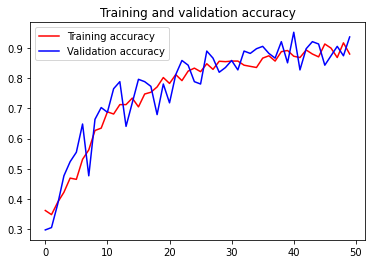

<Figure size 432x288 with 0 Axes>

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>=0.96):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 96%!")
      self.model.stop_training = True
 
callbacks = myCallback()
 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                
    
    tf.keras.layers.Dense(512, activation='relu'),                                
    
    tf.keras.layers.Dense(3, activation='softmax')                                
])
 
model.summary()
 
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
 
history=model.fit(
    train_generator,
    steps_per_epoch=16,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=4, 
    verbose=2,
    callbacks=[callbacks]
    )
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [12]:
true_label = [0] * 30
for i in range(2, 11):
  true_label[i]=1

Saving 4X8TOCQTfCWnMfm2.png to 4X8TOCQTfCWnMfm2.png
4X8TOCQTfCWnMfm2.png
[[0. 0. 1.]]
GUNTING


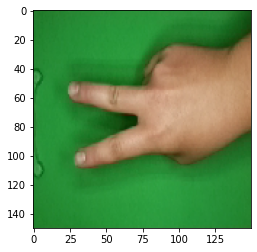

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  if classes[0][0]==1:
    print('KERTAS')
  elif classes[0][1]==1:
    print('BATU')
  elif classes[0][2]==1:
    print('GUNTING')
  else:
    print('Tidak Diketahui')  